In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


<Axes: xlabel='X', ylabel='Y'>

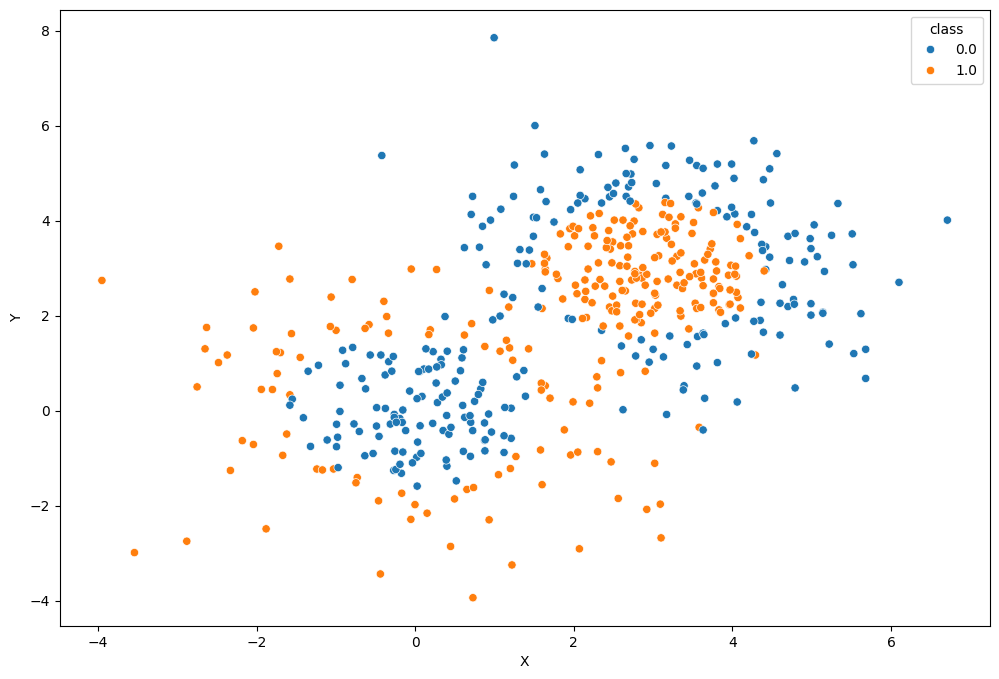

In [3]:
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class'])

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [4]:
from sklearn.linear_model import LogisticRegression

### Your code is here

X = circ.drop('class', axis=1)
y = circ['class']

lr = LogisticRegression()
lr.fit(X, y)

print(f'Train accuracy: {lr.score(X, y)}')


Train accuracy: 0.424


In [5]:
betta_0 = lr.intercept_[0]
betta_1, betta_2 = lr.coef_[0][0], lr.coef_[0][1]

betta_0, betta_1, betta_2

(0.02848740977042779, -0.0031609958626715416, -0.012048602888289609)

In [6]:
x_vals = np.array([np.min(circ['X']), np.max(circ['X'])])
y_vals = -(betta_0+betta_1*x_vals)/betta_2

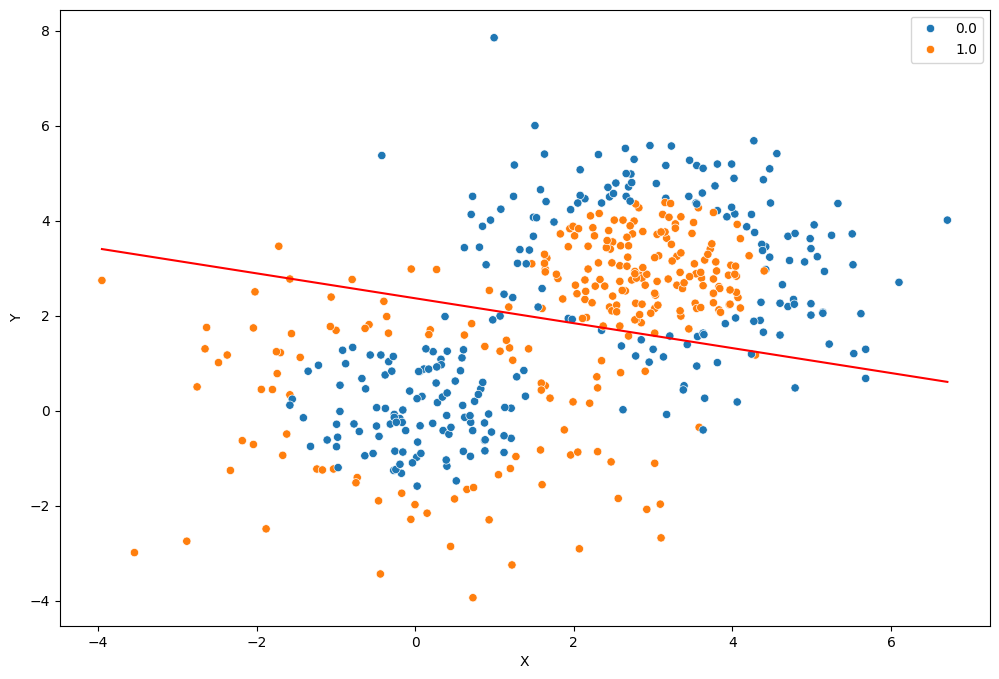

In [7]:
plt.figure()
sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class'])
sns.lineplot(x=x_vals, y=y_vals, color='red')

plt.show()

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [8]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

### Your code is here

knn_list = []
accuracy_list = []

for k in all_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_list.append(knn)
    accuracy_list.append(knn.score(X_test, y_test))


In [11]:
knn_list[0].n_neighbors

1

In [12]:
for k in knn_list:
    print(f'k: {k.n_neighbors}, train_score: {k.score(X_train, y_train)}, test_score: {k.score(X_test, y_test)}')

k: 1, train_score: 1.0, test_score: 0.89
k: 3, train_score: 0.9475, test_score: 0.87
k: 10, train_score: 0.915, test_score: 0.85
k: 30, train_score: 0.8525, test_score: 0.74
k: 40, train_score: 0.8, test_score: 0.75
k: 60, train_score: 0.6925, test_score: 0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [13]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

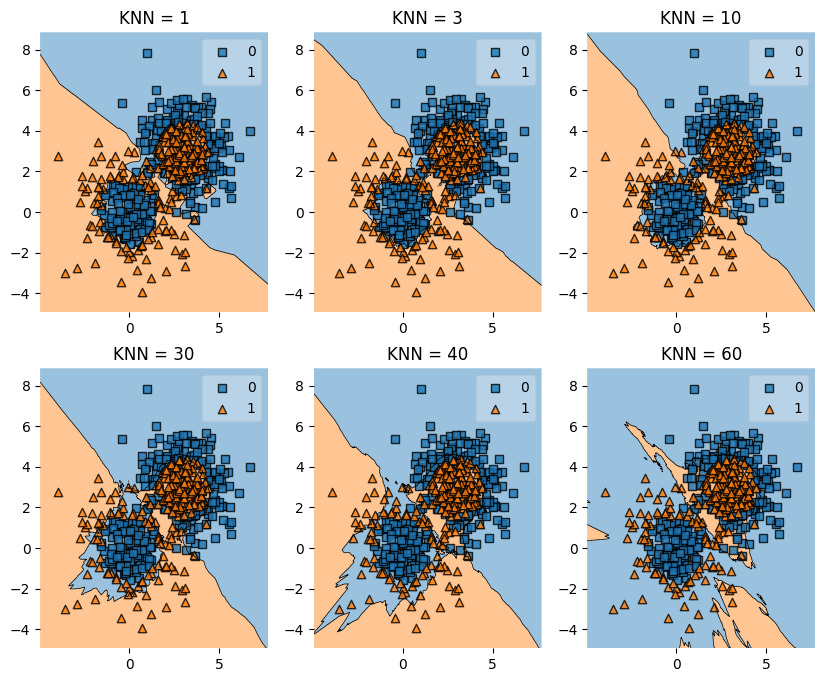

In [14]:
### Your code is here

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(10, 8))

for model, grid in zip(knn_list, itertools.product(range(2), range(3))):
    ax = plt.subplot(gs[grid[0], grid[1]])
    fig = plot_decision_regions(X=X, y=y, clf=model)
    ax.set_title(f'KNN = {model.n_neighbors}')

plt.show()

1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [15]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [17]:
### Your code is here

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


for k in [1, 5, 10]:
    pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=k))])
    knn_class = KNeighborsClassifier(n_neighbors=k)
    pipe_knn.fit(X_train, y_train)
    knn_class.fit(X_train, y_train)
    print(f'Ошибка на тесте (отнормированные): {pipe_knn.score(X_test, y_test)}')
    print(f'Ошибка на тесте (ненормированные): {knn_class.score(X_test, y_test)}')

Ошибка на тесте (отнормированные): 0.5648805681084571
Ошибка на тесте (ненормированные): 0.43819542019519236
Ошибка на тесте (отнормированные): 0.6303877264269168
Ошибка на тесте (ненормированные): 0.44317016671097104
Ошибка на тесте (отнормированные): 0.6607678578209851
Ошибка на тесте (ненормированные): 0.4703603843086621


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [18]:
### Your code is here

pipe_knn = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=10, p=1))])
pipe_knn.fit(X_train, y_train)

print(f'Accuracy на тесте: {pipe_knn.score(X_test, y_test)}') 

Accuracy на тесте: 0.6611476094634109


**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [19]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


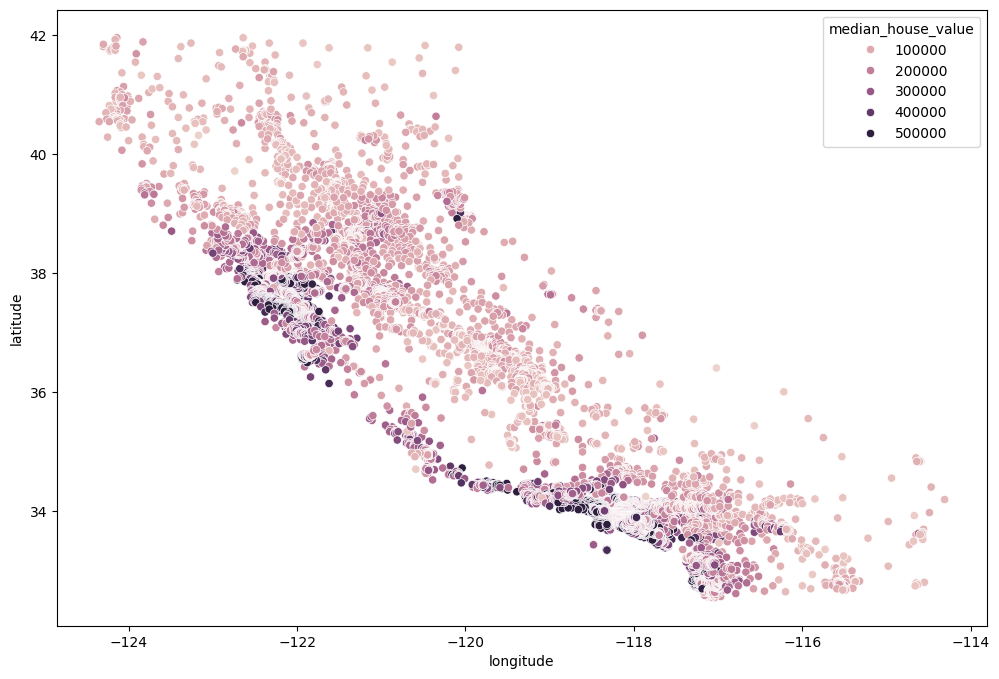

In [20]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot(x='longitude', y='latitude', data=X, hue=y);

In [21]:
### Your code is here

def kernel(distance, h=1):

    const = 1/(np.sqrt(2*np.pi))
    power = (-1/2)*(distance**2)/h**2
    return const*np.exp(power)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import PredefinedSplit, GridSearchCV


pipe = Pipeline([('sckaler', StandardScaler()), ('knn', KNeighborsRegressor(weights=kernel))])

param_grid = {'knn__n_neighbors': np.arange(10)}

ps = PredefinedSplit([0 if x in X_train.index else -1 for x in X.index])

search = GridSearchCV(pipe, param_grid, cv=ps)

search.fit(X, y)

print(f'Лучшие параметры CV score: {search.best_score_}, knn_n_neighbors: {search.best_params_}')

Лучшие параметры CV score: 0.7221592325867963, knn_n_neighbors: {'knn__n_neighbors': 5}


In [33]:
from sklearn.metrics import mean_squared_error


for h in np.arange(0.02, 0.1, 0.01):

    def kernel(distance, h=h):

        const = 1/(np.sqrt(2*np.pi))
        power = (-1/2)*(distance**2)/h**2

        return const*np.exp(power)
    
    pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=5, weights=kernel))])

    pipe.fit(X_train, y_train)

    print(f'KNN Regressor RMLSE: {mean_squared_error(y_test, pipe.predict(X_test))**0.5}, h: {h:.3}')


KNN Regressor RMLSE: 52707.235102691186, h: 0.02
KNN Regressor RMLSE: 52696.65217249863, h: 0.03
KNN Regressor RMLSE: 52729.56939521122, h: 0.04
KNN Regressor RMLSE: 52753.29770345939, h: 0.05
KNN Regressor RMLSE: 52769.35059260732, h: 0.06
KNN Regressor RMLSE: 52781.16684153389, h: 0.07
KNN Regressor RMLSE: 52790.069937000124, h: 0.08
KNN Regressor RMLSE: 52796.826350826166, h: 0.09


In [34]:
from sklearn.linear_model import LinearRegression


model = Pipeline([('scaler', StandardScaler()), ('LinReg', LinearRegression())])

model.fit(X_train, y_train)

print(f'Linear Regressor RMLSE: {mean_squared_error(y_test, pipe.predict(X_test))**0.5}')

Linear Regressor RMLSE: 52796.826350826166
